# Final Exam will be emailed between 16:00 and 16:30 EDT on 28 Nov

<br><br>

# Final Exam submission due 5 Dec by 16:30 EDT on Blackboard

<br><br>

# Late submission will receive a failing grade

<br><br>

# Solution to final exam will be reviewed at the 12/5 lecture

<br><br><br><br>

# Lecture 11a - Edge Detection

<br>

<b>Shapes within an image are usually defined by their boundaries and these boundaries can be detected or enhanced with edge detection or enhancement algorithms</b><br><br>

<b>Some texture measures are also reliant on the ability to detect edges</b><br><br>

<b>We will review some (but certainly not all) of the common edge detection methods </b><br><br>

<br><br><br><br>

## Edges

<br>

<b>Edges for gray scale images are generally defined as large or abrupt changes in intensity along a line or curve</b><br><br>

<b>These changes would be evident as large values in the first derivative of a signal</b><br><br>

<b>Since an image has at least two dimensions the derivative has a slightly more complicated definition than in the one-dimensional case</b><br><br>

<b>A hard edge exists when the change is very abrupt perhaps only 2 or 3 pixels wide</b><br><br>

<b>A soft edge exists when the transition from bright to dark takes several pixels</b><br><br>

<b>As there are several models for enhancing edges the operator notation is initially generic</b><br><br>

<b>Given an image ${\bf a}[\vec x]$ the edge enhanced is generated via

${\bf b}[\vec x] = E_m {\bf a}[\vec x]$

where $E_m$ is the edge operator for model $m$
</b><br><br>

<br><br>

<b>Perhaps one of the easiest methods of detecting edges is to compared shifted versions of the same image</b><br><br>

<b>The Shift operator, $D_{\vec x}$ performs this shift, and it is associated with the shift function from the scipy.ndimage module</b><br><br>

<b>However, the function is designed to accommodate shifts that are fractions of a pixel width. In order to do this, the algorithm employs a spline fit that is third-order by default</b><br><br>

<b>This can cause some issues in some cases</b><br><br>

<b>Consider the simple example below</b><br><br>

<b>We will create a 5x5 matrix with one pixel set to 1</b><br><br>

<b>We will then shift this matrix one pixel and so the result should also have one pixel set to 1</b><br><br>

<b>However we see that there are 8 (really?) pixels that are greater than 0</b><br><br>

<b>The function uses the spline fit to compute the values of the pixels, and now, nine of the pixels have a nonzero value</b><br><br>

<b>These values are very small, but if a threshold was applied to the images then the error becomes enormous</b><br><br>

<b>So, for some applications, the user may choose to bypass the spline fit by setting the order to 0 to obtain the correct answer</b><br><br>

<br><br>

In [1]:
# simple example - create a 5x5 matrix with only one pixel set to 1
import numpy as np
import scipy.ndimage as nd

adata = np.zeros((5,5))
adata[2,2] = 1
print('\n', adata)
print('\nadata Sum:', (adata > 0).sum())

bdata = nd.shift(adata, (1,0))
print(bdata)
print('\nbdata > 0 Shift Sum:', (bdata > 0).sum())

bdata = nd.shift(adata, (1,0), order=0)
print('\nbdata > 0 Shift order = 0 Sum:', (bdata  > 0).sum())



 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

adata Sum: 1
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 2.12333776e-32 -6.06667932e-33  1.54390389e-16 -1.73472348e-18
   2.12333776e-32]
 [ 8.67361738e-19 -2.60208521e-17 -1.12757026e-17 -1.04083409e-17
   8.67361738e-19]
 [ 1.43982049e-16 -1.04083409e-16  1.00000000e+00 -3.98986399e-17
   1.43982049e-16]
 [-8.67361738e-19 -1.38777878e-17 -8.06646416e-17 -7.80625564e-18
  -8.67361738e-19]]

bdata > 0 Shift Sum: 8

bdata > 0 Shift order = 0 Sum: 1


<br><br><br><br>

<b>The vertical edges of an image can be enhanced by

${\bf b}[\vec x] = | {\bf a}[\vec x] - D_{\vec v} {\bf a}[\vec x] |$

where $\vec v$ is (0,1) for a horizontal shift
</b><br><br>

<b>The image below contains sharp edges in all directions and is used as ${\bf a}[\vec x]$. The negative of output ${\bf b}[\vec x]$ is shown below, and notably the horizontal edges are absent</b><br><br>  

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures13_14_15_16_17_18/ib3logo.png?raw=true" width="200"/img></div>
<br><br>

<b>Shifts in one direction extract edges that are perpendicular to the direction of the shift</b><br><br>

<b>Any value of $\vec v$ will produce an image with strong edges in one direction and missing edges in perpendicular direction</b><br><br>

<b>To capture edges in all directions, two opposing shifts are used as in

${\bf b}[\vec x] = | {\bf a}[\vec x] - D_{\vec v_1} {\bf a}[\vec x] | + | {\bf a}[\vec x] - D_{\vec v_2} {\bf a}[\vec x] |$

where $\vec v_1 \perp \vec v_2$ 
</b><br><br>

<b>This method is perhaps the simplest but not necessarily the most effective</b><br><br>

<b>The generic edge enhancement operator is $E_m$ where the $m$ is the user defined model</b><br><br>

<b>Thus, one definition is,

${\bf b}[\vec x] = E_m {\bf a}[\vec x] = | D_{\vec v} {\bf a}[\vec x] - {\bf a}[\vec x] |$
</b><br><br>

<br><br>

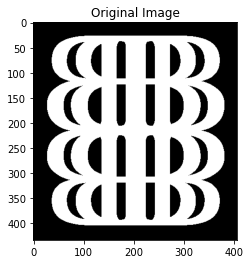

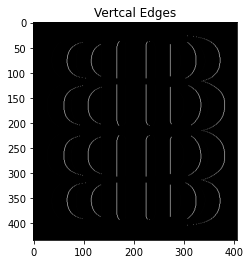

In [2]:
# edge example
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures13_14_15_16_17_18/ib3logo.png'
amg = imageio.imread(url, as_gray=True).astype(np.uint8)

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

bmg = abs(amg - nd.shift(amg,(0,1),order=0))

plt.title('Vertcal Edges')
plt.imshow(-bmg, cmap='gray')
plt.show()


<br><br><br><br>

## The Sobel Filters

<b>A slightly more sophisticated method of edge enhancement is the Sobel filter</b><br><br>

<b>This process is similar to the previous except that shift operations are replaced by small kernel correlations</b><br><br>

<b>These are two $3 \times 3$ matrices which are convolved with the original image


${\bf g_h}[\vec x] = \begin{bmatrix}
        -1 & 0 & 1 \\
	-2 & 0 & 2\\
        -1 & 0 & 1 
       \end{bmatrix}$

and

${\bf g_v}[\vec x]  = \begin{bmatrix}
        -1 & -2 & -1 \\
        0 & 0 & 0\\
        1 & 2 & 1 
       \end{bmatrix}$

</b><br><br>

<b>The ${\bf g_h}[\vec x]$ matrix is sensitive to horizontal edges and the ${\bf g_v}[\vec x]$ is sensitive to vertical edges</b><br><br>

<b>Given a gray scale image ${\bf a}[\vec x]$ the process correlates the matrices with the input image as

${\bf b}[\vec x] = {\bf a}[\vec x] \otimes {\bf g_h}[\vec x]$ 

and

${\bf c}[\vec x] = {\bf a}[\vec x] \otimes {\bf g_v}[\vec x]$
</b><br><br>

<b>From these two results it is possible to compute a single edge enhanced image sensitive to edges in any direction

${\bf d}[\vec x] = \sqrt{ \left( {\bf b}[\vec x] \right)^2 +  \left( {\bf c}[\vec x] \right)^2 }$

and to create an image that indicates the direction of the edge

${\bf t}[\vec x] = \tan^{-1} \left( \frac{ {\bf c}[\vec x] }{ {\bf b}[\vec x] } \right)$
</b><br><br>

<b>The ndimage module provides a Sobel filter allowing for easy implementation of this method</b><br><br>

<b>The two matrices $\bf g_h$ and $\bf g_v$ are produced by the function ndimage.sobel with a different axis argument</b><br><br>

<b>There are two methods for computing the arctangent in most programming languages</b><br><br>

<b>The arctan2 function is sensitive to which quadrant the angle is in and provides a slightly different result</b><br><br>

<br><br>

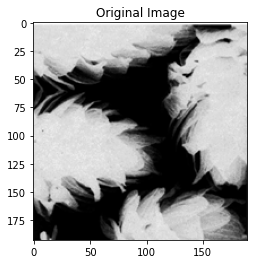

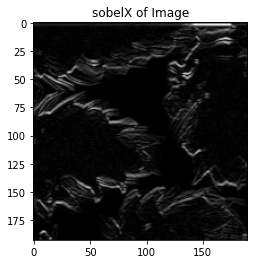

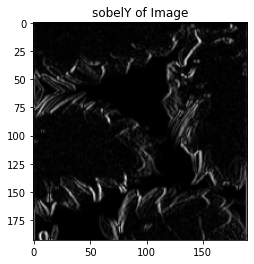

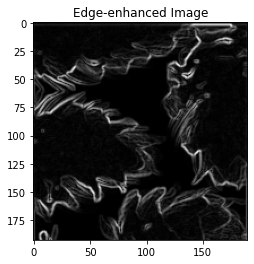

In [3]:
#  sobel example

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures13_14_15_16_17_18/L13_2.png'
data = imageio.imread(url, as_gray=True).astype(np.uint8)

plt.title('Original Image')
plt.imshow(data, cmap='gray')
plt.show()

sobelX = nd.sobel(data+0.,axis=0)
plt.title('sobelX of Image')
plt.imshow(abs(sobelX), cmap='gray')
plt.show()

sobelY = nd.sobel(data+0.,axis=1)
plt.title('sobelY of Image')
plt.imshow(abs(sobelY), cmap='gray')
plt.show()

edj = abs(sobelX) + abs(sobelY)
plt.title('Edge-enhanced Image')
plt.imshow(edj, cmap='gray')
plt.show()


<br><br><br><br>

##  Difference of Gaussians

<br>

<b>Each of the Sobel filters are OCOS (on-center off-surround) shaped</b><br><br>

<b>This type of shape is typical of edge extraction filters</b><br><br>

<b>In the shift method the edge value of a pixel was determined by the subtraction of just two pixels</b><br><br>

<b>In the Sobel method the value was determined by the small kernel which included values from 9 pixels</b><br><br>

<b>The method in this section is similar in nature, but there are more pixels involved in the determination of the edge value of a single pixel</b><br><br>

<b>A Gaussian function with unit area is

$y = \frac{1}{(2\pi)^{n/2} |\Sigma|^{-1} } \exp \left( -\frac{1}{2} (\vec x - \vec \mu) \Sigma^{-1} (\vec x - \vec \mu)^T \right)$

where $\Sigma$ is the covariance matrix and $\vec \mu$ locates the peak of the function at the center of the frame
</b><br><br>

<b>The Difference of Gaussian (DoG) filter is the subtraction of a wide Gaussian function from a narrower one</b><br><br>

<b>The one dimensional profile of a two dimensional filter is shown below</b><br><br>

<b>The filter in two-dimensions is circularly symmetric and the profile from any angle is this profile</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures13_14_15_16_17_18/L13_3.png?raw=true" width="400"/img></div>
<br><br>

<b>The scipy.ndimage module provides the gaussian_filter function which convolves a Gaussian profile with an input image</b><br><br>

<b>To coincide with this function the Gaussian operator is the convolution of a Gaussian profile with the input image</b><br><br>

<b>Thus, the creation and application of the filter is simply

${\bf b}[\vec x] = G_{\vec \sigma} {\bf a}[\vec x]$

where $\vec \sigma$ is the standard deviations along each axis
</b><br><br>

<b>If $\sigma$ is a scalar then the same standard deviation is applied to all dimensions</b><br><br>

<b>This equation will smooth an image</b><br><br>

<b>If the values of $\vec \sigma$ are dissimilar then the smoothing will be greater along one dimension instead of the other</b><br><br>

<br><br>

<b>The DoG filter is the difference between two applications of the Gaussian filter

${\bf b}[\vec x] = G_{\sigma_1} {\bf a}[\vec x] - G_{\sigma_2} {\bf a}[\vec x]$

where $\sigma_2 > \sigma_1$
</b><br><br>

<b>The function DoGFilter receives the input image and two $\sigma$ values</b><br><br>

<b>It then applies two filters to the original image</b><br><br>

<b>Usually, the $\sigma$ values are quite small</b><br><br>

<br><br>

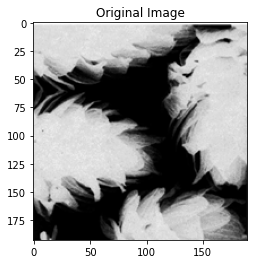

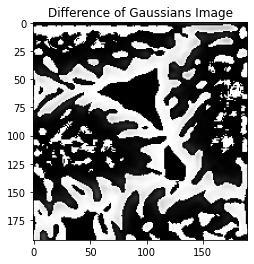

In [7]:
#  example of DoG filter
def DoGFilter(amg, sigma1, sigma2):
    b1 = nd.gaussian_filter(amg, sigma1)
    b2 = nd.gaussian_filter(amg, sigma2)
    answ = b1 - b2
    return answ

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures13_14_15_16_17_18/L13_2.png'
amg = imageio.imread(url, as_gray=True).astype(np.uint8)

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

bmg = DoGFilter(amg, 2, 4)

plt.title('Difference of Gaussians Image')
plt.imshow(bmg, cmap='gray')
plt.show()


<br><br><br><br>

## Corners

<b>As seen previously, the edges can be enhanced by several methods</b><br><br>

<b>Detecting corners is a little more complicated</b><br><br>

<b>The approach shown here is the Harris detector which relies on edge detection methods and the eigenvalues of the image structure. The latter requires a more detailed explanation</b><br><br>

<b>The first step in the Harris detector is to create a structure tensor</b><br><br>

<b>These values are combined algebraically to produce an image where the bright pixels are at the locations of corners in the image</b><br><br>

<b>The structure tensor for this problem is computed by

${\bf C} = \begin{pmatrix}
           \mathcal{S} (E_h {\bf a}[\vec x] )^2  & \mathcal{S} (E_{vh} {\bf a}[\vec x] )^2 \\
           \mathcal{S} (E_{vh} {\bf a}[\vec x] )^2 & \mathcal{S} (E_v {\bf a}[\vec x] )^2 \\
          \end{pmatrix}$

where $\mathcal{S}$ is the Smoothing operator and $E_m$ is the Edge operator
</b><br><br>

<b>The subscripts indicate the direction of the edges that are extracted</b><br><br>

<b>Thus $E_v {\bf a}[\vec x]$ is the vertical edges, and $E_{vh} {\bf a}[\vec x]$ are at a $45^\circ$ angle</b><br><br>

<b>The tensor C contains four numbers for each pixel, and these values are based upon the edge enhancements in various directions</b><br><br>

<b>For each pixel there is a $2 \times 2$ matrix, and the eigenvalues of this matrix are indicative of the type of flow in the image</b><br><br>

<b>If both eigenvalues are small then there is no flow in either direction</b><br><br>

<b>If one of the eigenvalues is large and the other small then there is a flow in a single direction which is a trait of an edge</b><br><br>

<b>If both eigenvalues are large then there is flow in both directions and that is a characteristic trait of a corner</b><br><br>

<br><br>

<b>The Harris measure is then a combination of the eigenvalues

$R = \det(C) - \alpha {\tt trace} ^2 (C) = \lambda_1 \lambda_2 - \alpha ( \lambda_1 + \lambda_2)^2$
</b><br><br>

<b>Computing the determinant and trace for all of the small matrices can be done en masse as shown in the function Harris</b><br><br>

<b>The Harris detector is represented by $\mathcal{H}$ and so the operation is simply

${\bf r}[\vec x] = \mathcal{H} {\bf a}[\vec x]$
</b><br><br>

<b>The creation of the Harris operator begins with the Sobel filters

${\bf b}[\vec x] = \left(  G_v {\bf a}[\vec x]  \right)^2$
${\bf c}[\vec x] = \left( G_h {\bf a}[\vec x]  \right)^2$
${\bf d}[\vec x] = | {\bf b}[\vec x] \times {\bf c}[\vec x] |$
</b><br><br>

<b>Each of these is smoothed

${\bf f_1} [\vec x] = \mathcal{S} {\bf b}[\vec x]$
${\bf f_2} [\vec x] = \mathcal{S} {\bf c}[\vec x]$
${\bf f_3} [\vec x] = \mathcal{S} {\bf d}[\vec x]$
</b><br><br>

<b>The determinant is computed by

${\bf g}[\vec x] = {\bf f_1} [\vec x] \times {\bf f_2} [\vec x] + 2 {\bf f_3} [\vec x]$

and the trace is computed by
${\bf h}[\vec x] = {\bf f_1} [\vec x] + {\bf f_2} [\vec x]$
</b><br><br>

<b>The final result is then

${\bf r}[\vec x] = \mathcal{H} {\bf a}[\vec x]  = {\bf g} [\vec x] - \alpha {\bf h} ^2[\vec x]$
</b><br><br>

<b>A simple example uses an image with simple geometric patterns</b><br><br>

<b>The rectangles has sharp corners and reaction of these to the filter create bright pixels in the output</b><br><br>

<b>Sharp edges that are not corners have been suppressed as seen by the dark pixels</b><br><br>

<b>The circles, of course, do not produce any positive response by the filter</b><br><br>

<br><br>

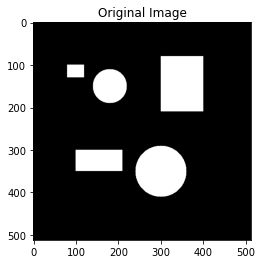

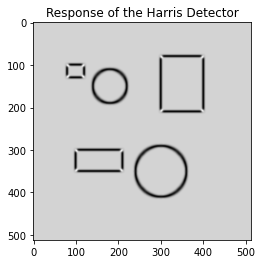

In [5]:
#  Harris filter example
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd

def Harris(indata, alpha=0.2):
    Ix = nd.sobel(indata, 0)
    Iy = nd.sobel(indata, 1)
    Ix2 = Ix**2;     Iy2 = Iy**2
    Ixy = abs(Ix * Iy)
    Ix2 = nd.gaussian_filter(Ix2, 3)
    Iy2 = nd.gaussian_filter(Iy2, 3)
    Ixy = nd.gaussian_filter(Ixy, 3)
    detC = Ix2 * Iy2 - 2 * Ixy
    trC = Ix2 + Iy2
    R = detC - alpha * trC**2
    return R

def Circle(size, loc, rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1,b2 = np.indices(size)
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = (mask <= rad*rad).astype(int)
    return mask

#  set up the geo forms; same as before
adata = np.zeros((512,512))
adata[100:130,80:120] = 1
adata[300:350,100:210] = 1
adata[80:210,300:400] = 1
adata += Circle((512,512), (150,180), 40)
adata += Circle((512,512), (350,300), 60)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

R = Harris(adata)

plt.title('Response of the Harris Detector')
plt.imshow(R, cmap='gray')
plt.show()


<br><br><br><br>

# Putting these concepts together

<br><br>

## SMOOTHING AND BLURRING

<br>

<b>Blurring  means that each pixel in the image is most likely mixed in with its surrounding pixel intensities</b><br><br>

<b>While this effect is usually unwanted in our photographs, it’s actually quite helpful when performing image processing tasks</b><br><br>

<b>Many image processing and computer vision functions, such as thresholding and edge detection, perform better if the image is first smoothed or blurred</b><br><br>

<br><br><br><br>

## Thresholding

<br>

<b>Thresholding is the binarization of an image</b><br><br>

<b>We seek to convert a grayscale image to a binary image, where the pixels are either 0 or 255</b><br><br>

<b>A simple thresholding example</b><br><br>
1. Select a pixel value p
2. Set all pixel intensities less than p to zero
3. Set all pixel values greater than p to 255

<b> with this procedure a binary representation of the image is created</b><br><br>

<b>Example</b>

<br><br>

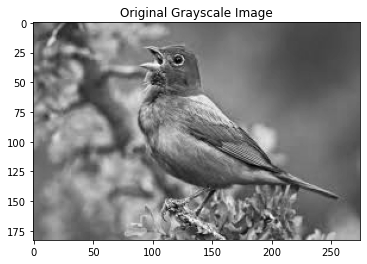

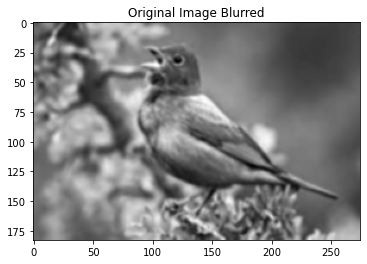

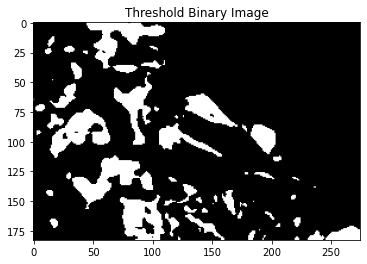

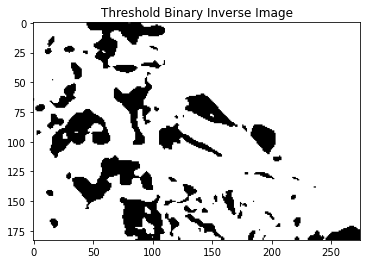

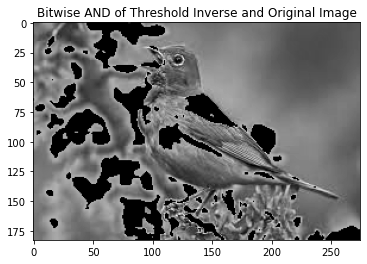

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imageio

url = 'https://raw.githubusercontent.com/joefoxva1/GGS_590_DL/master/Picures/bird.jpg'
image = imageio.imread(url)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title('Original Grayscale Image')
plt.imshow(image, cmap='gray')
plt.show()

blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.title('Original Image Blurred')
plt.imshow(blurred, cmap='gray')
plt.show()

(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
plt.title('Threshold Binary Image')
plt.imshow(thresh, cmap='gray')
plt.show()

(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

plt.title('Threshold Binary Inverse Image')
plt.imshow(threshInv, cmap='gray')
plt.show()

plt.title('Bitwise AND of Threshold Inverse and Original Image')
plt.imshow(cv2.bitwise_and(image, image, mask = threshInv), cmap='gray')
plt.show()


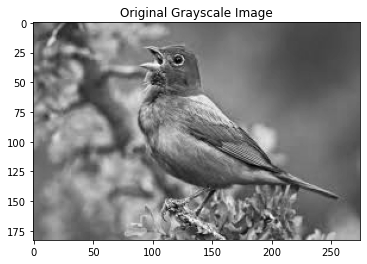

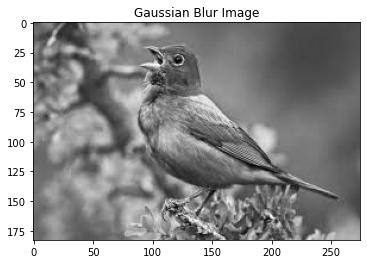

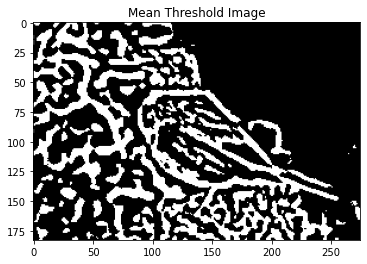

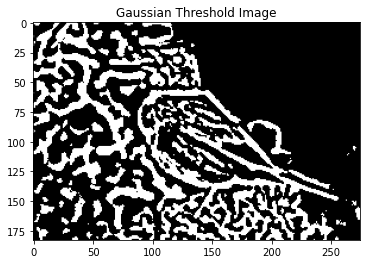

In [7]:
image = imageio.imread(url)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.title('Original Grayscale Image')
plt.imshow(image, cmap='gray')
plt.show()

blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.title('Gaussian Blur Image')
plt.imshow(image, cmap='gray')
plt.show()

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
plt.title('Mean Threshold Image')
plt.imshow(thresh, cmap='gray')
plt.show()

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
plt.title('Gaussian Threshold Image')
plt.imshow(thresh, cmap='gray')
plt.show()


<br><br><br><br>

## Gradient and Edge Detection

<b>Edge detection encompasses mathematical methods to find points in an image where the brightness of pixel intensities changes distinctly</b><br><br>

1. Apply Canny edge detection, a multi-stage process of noise reduction (blurring)
2. Find the gradient of the image (utilizing the Sobel kernel in both the horizontal and vertical direction)
3. Apply non-maximum suppression
4. Apply hysteresis thresholding

<br><br>

<b>First let's look at another example</b><br><br>


### Laplacian

<b>The Laplacian, as a second derivative can be used to detect edges and call the Sobel operator to perform the operations</b><br><br>

$\operatorname{Laplace}(f)=\frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}$


<br><br>

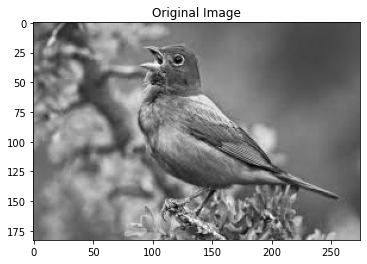

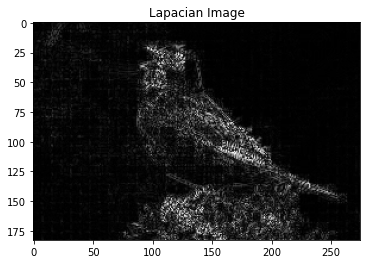

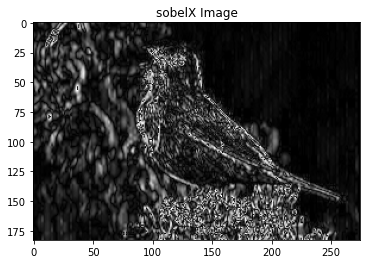

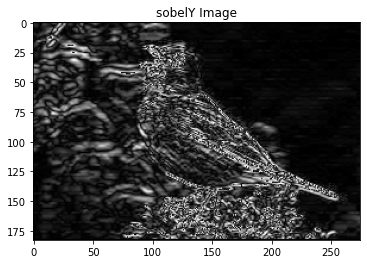

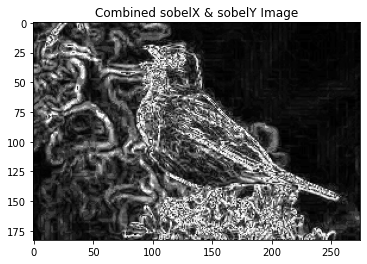

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

url = 'https://raw.githubusercontent.com/joefoxva1/GGS_590_DL/master/Picures/bird.jpg'
image = imageio.imread(url)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()

lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.title('Lapacian Image')
plt.imshow(lap, cmap='gray')
plt.show()

sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)
plt.title('sobelX Image')
plt.imshow(sobelX, cmap='gray')
plt.show()

plt.title('sobelY Image')
plt.imshow(sobelY, cmap='gray')
plt.show()

plt.title('Combined sobelX & sobelY Image')
plt.imshow(sobelCombined, cmap='gray')
plt.show()


<br><br>

<b>Note how edges are detected in this example</b><br><br>

<b>One can tell what this image is based on the edges</b><br><br>

## Canny Edge Detector<br>

<b>The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images</b><br><br>

<b>It was developed by John F. Canny in 1986</b><br><br>

<b>Canny edge detection is a technique to extract useful structural information from different vision objects and dramatically reduce the amount of data to be processed</b><br><br>

<b>It has been widely applied in various computer vision systems</b><br><br>

<br><br>

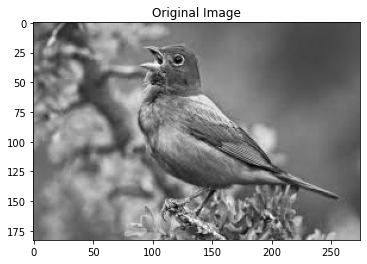

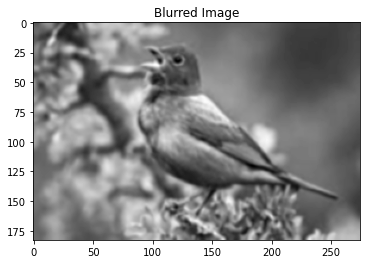

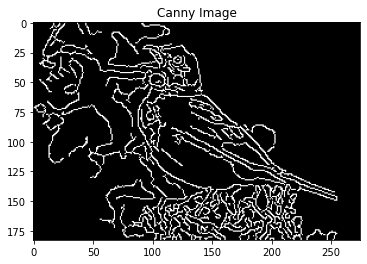

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

url = 'https://raw.githubusercontent.com/joefoxva1/GGS_590_DL/master/Picures/bird.jpg'
image = imageio.imread(url)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()

image = cv2.GaussianBlur(image, (5, 5), 0)
plt.title('Blurred Image')
plt.imshow(image, cmap='gray')
plt.show()

canny = cv2.Canny(image, 30, 150)
plt.title('Canny Image')
plt.imshow(canny, cmap='gray')
plt.show()

<br><br>

<b>Note how edges are detected in this example</b><br><br>

<b>One can tell what this image is based on the edges</b><br><br>

<b>The simpler the picture the more obvious what the edges depicts</b><br><br>

<br><br>

## Contours

<b>OpenCV provides methods to find “curves” in an image, called contours</b><br><br>

<b>A contour is a curve of points, with no gaps in the curve</b><br><br>

<br><br>

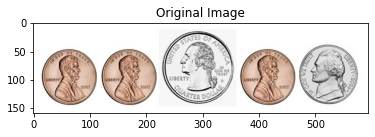

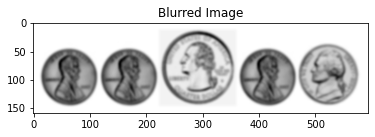

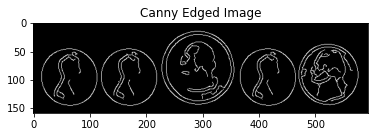

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

url = 'https://raw.githubusercontent.com/joefoxva1/GGS_590_DL/master/Picures/Coins.png'
image = imageio.imread(url)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()

blurred = cv2.GaussianBlur(gray, (11, 11), 0)
plt.title('Blurred Image')
plt.imshow(blurred, cmap='gray')
plt.show()

edged = cv2.Canny(blurred, 30, 150)
plt.title('Canny Edged Image')
plt.imshow(edged, cmap='gray')
plt.show()



There are 5 coins in this image


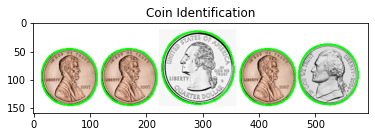

In [11]:
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("There are {} coins in this image".format(len(cnts)))

coins = image.copy()  # copy of color image
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
plt.title('Coin Identification')
plt.imshow(coins)
plt.show()


367 45 99 101
Coin #1


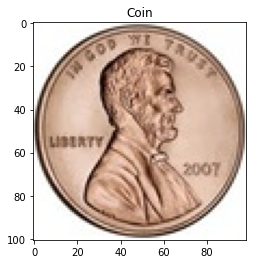

121 45 99 101
Coin #2


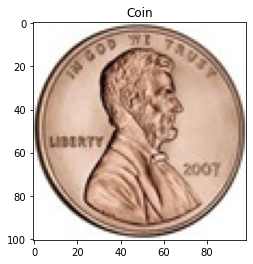

15 45 99 101
Coin #3


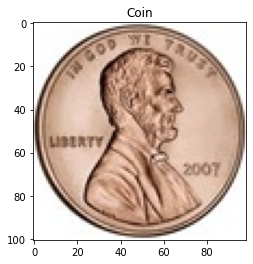

471 37 106 108
Coin #4


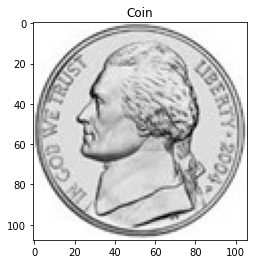

228 14 129 130
Coin #5


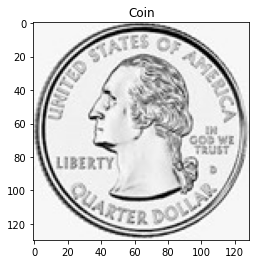

In [12]:
for (i, c) in enumerate(cnts):  # split out each coin
    (x, y, w, h) = cv2.boundingRect(c)
    print(x, y, w, h)
    print("Coin #{}".format(i + 1))
    coin = image[y:y + h, x:x + w]
    plt.imshow(coin)
    plt.title('Coin')
    plt.show()

    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)


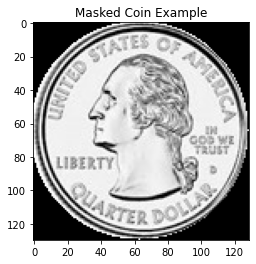

In [13]:
cv2.circle(mask, (int(centerX), int(centerY)), int(radius),255, -1)
mask = mask[y:y + h, x:x + w]
plt.title('Masked Coin Example')
plt.imshow(cv2.bitwise_and(coin, coin, mask =mask))
plt.show()

<br><br>

<b>You can see by the above example how building on simple concepts useful problems can be solved</b><br><br>

<br><br><br><br>

#  Homework 11a

<br><br>

1.  Using the ib3logo.png image, create and display the horizontal edges.<br><br>

2.  Apply the DoG filter to the ib3logo.png image with sigma1=2 and sigma2=4. Display the beginning and final images.<br><br>

3.  Apply the Harris filter to the ib3logo.png image. Display the beginning and final images.